<a href="https://colab.research.google.com/github/328prashant16/mlpweek2/blob/main/black_friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 %matplotlib inline

In [4]:
df_train= pd.read_csv('/content/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


Retail company wants to undersastand customer beahviour.
build model to predict the purchase amount of customer against various product which will help to create personalized offer for customers against different products


In [5]:
df_test=pd.read_csv('/content/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
df=df_train.append(df_test)

In [7]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459469 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     459469 non-null  int64  
 1   Product_ID                  459469 non-null  object 
 2   Gender                      459469 non-null  object 
 3   Age                         459469 non-null  object 
 4   Occupation                  459469 non-null  int64  
 5   City_Category               459469 non-null  object 
 6   Stay_In_Current_City_Years  459469 non-null  object 
 7   Marital_Status              459469 non-null  int64  
 8   Product_Category_1          459468 non-null  float64
 9   Product_Category_2          317015 non-null  float64
 10  Product_Category_3          140177 non-null  float64
 11  Purchase                    225869 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 45.6+ MB


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.594690e+05,459469.000000,459469.000000,459468.000000,317015.000000,140177.000000,225869.000000
mean,1.002987e+06,8.086596,0.409294,5.284472,9.848465,12.662798,9318.725310
std,1.713316e+03,6.524100,0.491704,3.742139,5.090324,4.126842,4971.357354
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5860.000000
50%,1.003026e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8059.000000
75%,1.004411e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12061.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [10]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


In [11]:
 df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8.0,NaN,NaN,7969.0


In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Age']=label_encoder.fit_transform(df['Age'])
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [15]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,0,0,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,0,0,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,1,6,16,C,4+,0,8.0,NaN,NaN,7969.0


In [16]:
  df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
df['City_Category']=df['City_Category'].map({'A':1,'B':2,'C':3})

In [18]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,1,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,0,0,10,1,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,1,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,0,0,10,1,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,1,6,16,3,4+,0,8.0,NaN,NaN,7969.0


In [19]:
 df.drop(['User_ID'],axis=1,inplace=True)

In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3.0,NaN,NaN,8370.0
1,P00248942,0,0,10,1,2,0,1.0,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12.0,NaN,NaN,1422.0
3,P00085442,0,0,10,1,2,0,12.0,14.0,NaN,1057.0
4,P00285442,1,6,16,3,4+,0,8.0,NaN,NaN,7969.0


In [21]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 1
Product_Category_2            142454
Product_Category_3            319292
Purchase                      233600
dtype: int64

In [22]:
df['Product_Category_2'].unique()
df['Product_Category_2'].mode()[0]

8.0

In [23]:
df['Product_Category_2'].value_counts()

8.0     53735
14.0    46570
2.0     41563
16.0    36406
15.0    31890
5.0     21803
4.0     21703
6.0     13885
11.0    11944
17.0    11291
13.0     8869
9.0      4871
12.0     4584
10.0     2586
3.0      2433
18.0     2394
7.0       488
Name: Product_Category_2, dtype: int64

In [24]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [25]:
df['Product_Category_2'].isnull().sum()

0

In [26]:
 df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [27]:
df['Product_Category_3'].isnull().sum()

0

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3.0,8.0,16.0,8370.0
1,P00248942,0,0,10,1,2,0,1.0,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12.0,8.0,16.0,1422.0
3,P00085442,0,0,10,1,2,0,12.0,14.0,16.0,1057.0
4,P00285442,1,6,16,3,4+,0,8.0,8.0,16.0,7969.0


In [29]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
df.shape

(459469, 11)

In [31]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [32]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3.0,8.0,16.0,8370.0
1,P00248942,0,0,10,1,2,0,1.0,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12.0,8.0,16.0,1422.0
3,P00085442,0,0,10,1,2,0,12.0,14.0,16.0,1057.0
4,P00285442,1,6,16,3,4,0,8.0,8.0,16.0,7969.0


In [33]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459469 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  459469 non-null  object 
 1   Gender                      459469 non-null  int64  
 2   Age                         459469 non-null  int64  
 3   Occupation                  459469 non-null  int64  
 4   City_Category               459469 non-null  int64  
 5   Stay_In_Current_City_Years  459469 non-null  int64  
 6   Marital_Status              459469 non-null  int64  
 7   Product_Category_1          459468 non-null  float64
 8   Product_Category_2          459469 non-null  float64
 9   Product_Category_3          459469 non-null  float64
 10  Purchase                    225869 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 42.1+ MB


In [35]:
df['Product_Category_2']=df['Product_Category_2'].astype(int)

In [36]:
df['Product_Category_3']=df['Product_Category_3'].astype(int)

In [38]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


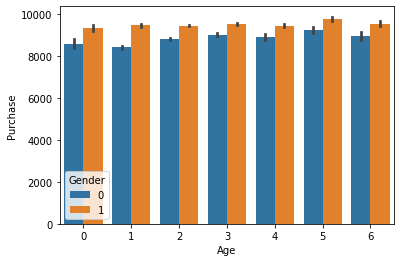

In [39]:
sns.barplot('Age','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


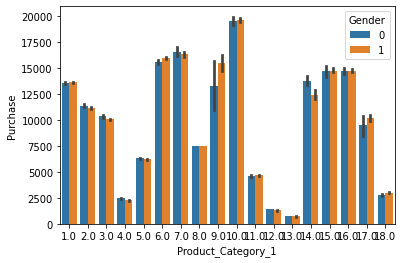

In [40]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

In [44]:
df_test=df[df['Purchase'].isnull()]

In [46]:
df_train=df[~df['Purchase'].isnull()]

In [58]:
X=df_train.drop('Purchase',axis=1)

In [59]:
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,0,0,10,1,2,0,3.0,8,16
1,P00248942,0,0,10,1,2,0,1.0,6,14
2,P00087842,0,0,10,1,2,0,12.0,8,16
3,P00085442,0,0,10,1,2,0,12.0,14,16
4,P00285442,1,6,16,3,4,0,8.0,8,16


In [60]:
X.shape

(225869, 10)

In [61]:
y=df_train['Purchase']

In [62]:
y.shape

(225869,)

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=33,random_state=42)

In [67]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)